# Dataset de severidade

In [12]:
import pandas as pd

severity_df = pd.read_csv("Data/severity.csv")
severity_df[(severity_df["date"] < "2008-02-19") & (severity_df["severity_acc"] > 0)]

,Unnamed: 0,occurrence_id,planting_relative_day,date,severity_acc
902980,902980,9412,0,2008-01-01,4.8666
902981,902981,9412,1,2008-01-02,17.6718
902982,902982,9412,2,2008-01-03,21.8294
902983,902983,9412,3,2008-01-04,25.2626
902984,902984,9412,4,2008-01-05,30.9144
...,...,...,...,...,...
1529021,1529021,364,297,2005-07-17,710.5557
1529022,1529022,364,298,2005-07-18,710.5557
1529023,1529023,364,299,2005-07-19,710.5557
1529024,1529024,364,300,2005-07-20,710.5557


<Axes: title={'center': 'Severidade acumulada para ocorrência ID 9412 >2024-07-16 22:38<'}, xlabel='date'>

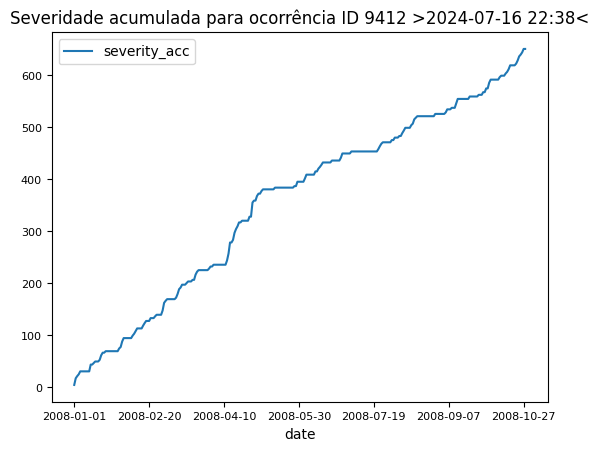

In [22]:
occurrence_id = 9412

severity_plot_df = severity_df[severity_df["occurrence_id"] == occurrence_id]

severity_plot_df.plot(
    y="severity_acc", x="date", 
    kind="line",
    fontsize=8,
    title=f"Severidade acumulada para ocorrência ID 9412 >{current_datetime_gen}<"
)

<Axes: title={'center': 'Severidade acumulada para ocorrência ID 9412 >2024-07-16 22:38<'}, xlabel='date'>

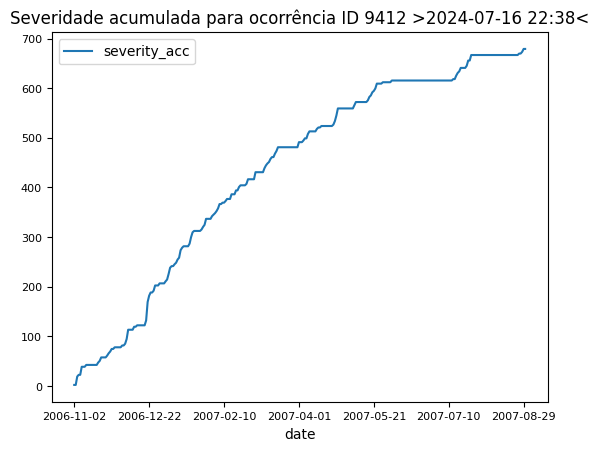

In [36]:
occurrence_id = 3255

severity_plot_df = severity_df[severity_df["occurrence_id"] == occurrence_id]

severity_plot_df.plot(
    y="severity_acc", x="date", 
    kind="line",
    fontsize=8,
    title=f"Severidade acumulada para ocorrência ID 9412 >{current_datetime_gen}<"
)

# Dataset de features para instâncias de Ferrugem Asiática da Soja

In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.5 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.5 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.4 MB/s eta 0:00:00


In [3]:
from datetime import datetime

current_datetime_gen = datetime.now().strftime("%Y-%m-%d %H:%M")
current_datetime_gen

'2024-07-16 22:38'

In [4]:
import pandas as pd


instances_df = pd.read_csv("Data/instances_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])
instances_features_df = pd.read_csv("Data/features_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])

## Formato do dataset

In [45]:
instances_features_df[["ocorrencia_id", "precipitation_acc_126d", "precipitation_count_126d", "precipitation_acc_133d", "precipitation_count_133d", "planting_relative_day"]].sample(10)

,ocorrencia_id,precipitation_acc_126d,precipitation_count_126d,precipitation_acc_133d,precipitation_count_133d,planting_relative_day
4771,1301,333.2500,50,338.7500,51,82
543,15115,1698.2500,170,1746.3750,176,56
4570,2456,812.2500,77,821.0000,78,68
1223,10969,531.9375,63,547.4375,64,82
2812,7826,582.5625,49,583.1875,50,82
2179,8784,461.7500,52,465.1250,54,82
4575,2342,688.0000,64,711.3750,68,56
1746,9502,532.8750,56,532.8750,56,82
1219,11078,612.6250,72,625.1250,73,56
3973,5149,401.6875,58,409.9375,59,46


## Instâncias por safra

==> Total: 5063 <==


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Dataset: Instâncias de ocorrência por ano >2024-07-16 22:38<'}, ylabel='safra'>

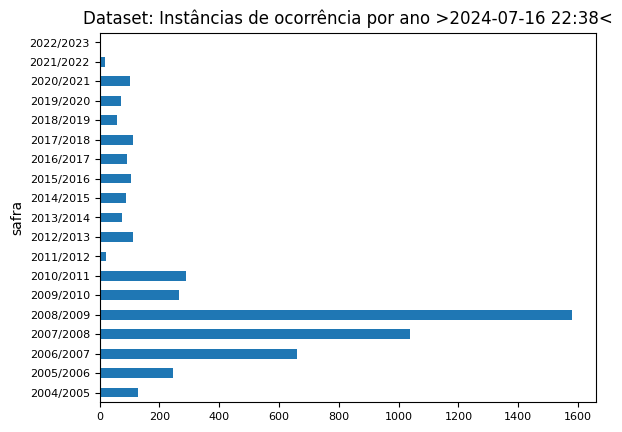

In [5]:
instances_per_year_df = instances_df[instances_df["data_ocorrencia"].notnull()]
instances_per_year_df = instances_per_year_df.groupby("safra")["safra"].count()

print(f"==> Total: {instances_df.shape[0]} <==")
instances_per_year_df.plot(y="safra", kind="barh", fontsize=8, title=f"Dataset: Instâncias de ocorrência por ano >{current_datetime_gen}<")

134


<Axes: title={'center': "Maior 'dia relativo do plantio' de ocorrência das instâncias, por safra >2024-07-16 22:38<"}>

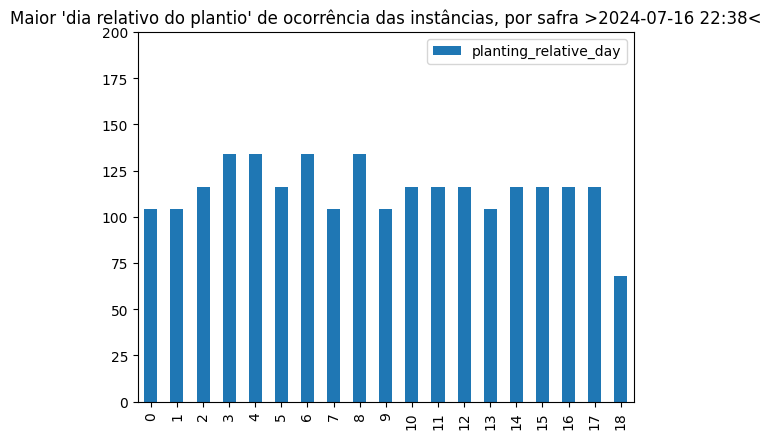

In [6]:
instances_per_year_df = instances_df.copy()
instances_per_year_df["planting_relative_day"] = instances_per_year_df["data_ocorrencia"] - instances_per_year_df["planting_start_date"]

relative_day_harvest = instances_per_year_df.groupby("safra", as_index=False)["planting_relative_day"].max()
relative_day_harvest['planting_relative_day'] = relative_day_harvest['planting_relative_day'].dt.days

# Colocar safra no eixo x
print(relative_day_harvest['planting_relative_day'].max())
relative_day_harvest.plot(y="planting_relative_day", kind="bar", ylim=(0, 200), title=f"Maior 'dia relativo do plantio' de ocorrência das instâncias, por safra >{current_datetime_gen}<")

## Features

## Dia relativo na safra (ocorrência)

<Axes: title={'center': "Valor 'dia relativo no plantio' no dataset de features >2024-07-16 22:38<"}, xlabel='safra'>

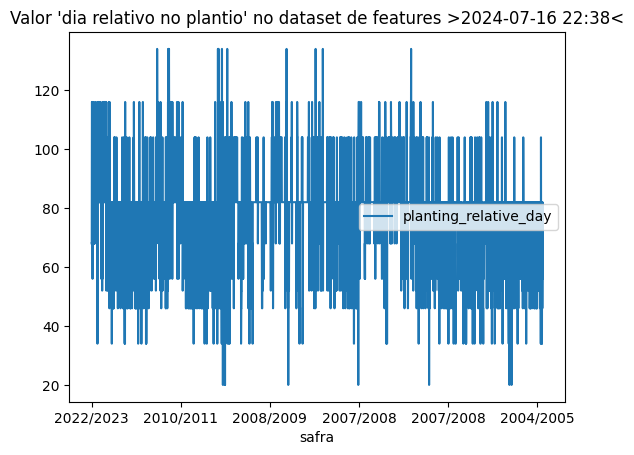

In [7]:
instances_features_df.plot(
    y="planting_relative_day", x="safra", 
    kind="line", 
    title=f"Valor 'dia relativo no plantio' no dataset de features >{current_datetime_gen}<"
)

<Axes: title={'center': "Valor 'dia relativo no plantio' no dataset de features >2024-07-16 22:38<"}, ylabel='Frequency'>

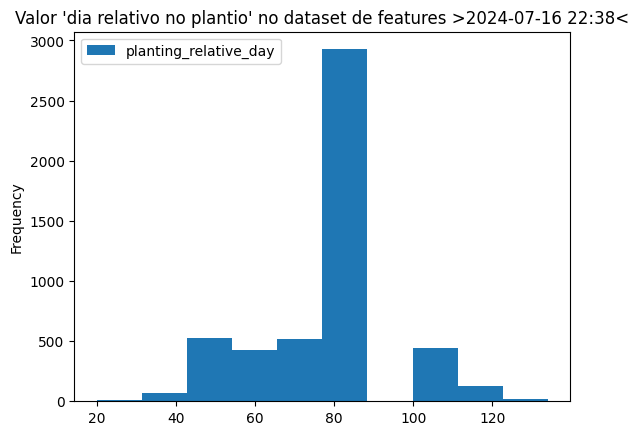

In [8]:
instances_features_df.plot(y="planting_relative_day", kind="hist", title=f"Valor 'dia relativo no plantio' no dataset de features >{current_datetime_gen}<")


In [9]:
df = pd.read_csv("Data/features_with_zero_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])

c = 7
while c <= 140:  
    print(f"precipitation_acc_{c}d com ZERO, count:\t", df[f"precipitation_acc_{c}d"].value_counts()[0])
    c += 7

print("total: ", df.shape[0])


precipitation_acc_7d com ZERO, count:	 416
precipitation_acc_14d com ZERO, count:	 84
precipitation_acc_21d com ZERO, count:	 34
precipitation_acc_28d com ZERO, count:	 10
precipitation_acc_35d com ZERO, count:	 80
precipitation_acc_42d com ZERO, count:	 80
precipitation_acc_49d com ZERO, count:	 312
precipitation_acc_56d com ZERO, count:	 605
precipitation_acc_63d com ZERO, count:	 1034
precipitation_acc_70d com ZERO, count:	 1549
precipitation_acc_77d com ZERO, count:	 1549
precipitation_acc_84d com ZERO, count:	 4476
precipitation_acc_91d com ZERO, count:	 4476
precipitation_acc_98d com ZERO, count:	 4476
precipitation_acc_105d com ZERO, count:	 4915
precipitation_acc_112d com ZERO, count:	 4915
precipitation_acc_119d com ZERO, count:	 5040
precipitation_acc_126d com ZERO, count:	 5040
precipitation_acc_133d com ZERO, count:	 5040
precipitation_acc_140d com ZERO, count:	 5063
total:  5063
